In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [5]:
df = pd.read_csv('India_Confirmed_Deaths_21.csv',index_col = 'Date')
df.head()

,Deaths
Date,
1/1/21,149474
1/2/21,149435
1/3/21,149649
1/4/21,149850
1/5/21,150114


In [18]:
Recovered_Cases = pd.read_csv('India_Recovered_Cases_21.csv', index_col = 'Date')
Recovered_Cases.head()

,Recovered_Cases
Date,
1/1/21,9929568
1/2/21,9927310
1/3/21,9946867
1/4/21,9975958
1/5/21,9997272


## Confirmed_Covid-19_Cases_India_2021

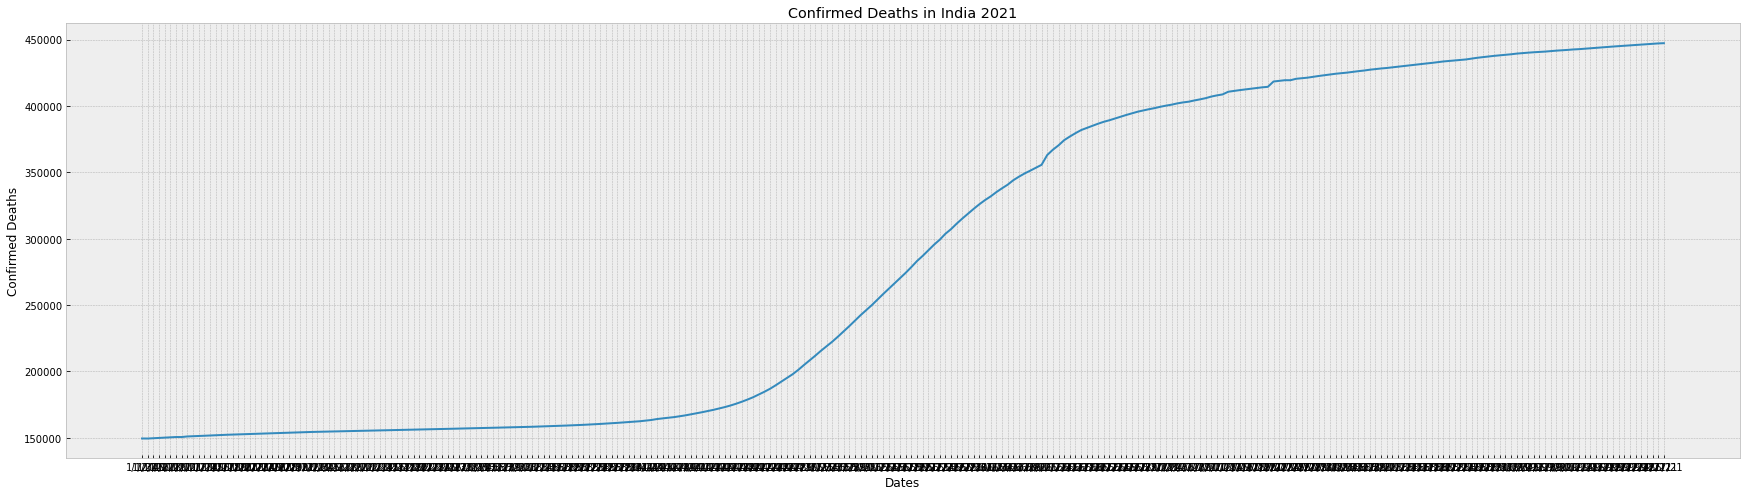

In [6]:
plt.figure(figsize=(30,8))
plt.title('Confirmed Deaths in India 2021')
plt.xlabel('Dates')
plt.ylabel('Confirmed Deaths')
plt.plot(df['Deaths'])
plt.show()

In [7]:
future_days = 25
df['Predicted Cases'] = df['Deaths'].shift(-future_days)
df.head()

,Deaths,Predicted Cases
Date,,
1/1/21,149474,153724.0
1/2/21,149435,153847.0
1/3/21,149649,154010.0
1/4/21,149850,154147.0
1/5/21,150114,154274.0


In [8]:
df.tail(25)

,Deaths,Predicted Cases
Date,,
9/3/21,440225,NaN
9/4/21,440533,NaN
9/5/21,440752,NaN
9/6/21,441042,NaN
9/7/21,441411,NaN
9/8/21,441749,NaN
9/9/21,442009,NaN
9/10/21,442317,NaN
9/11/21,442655,NaN


In [9]:
X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]
print(X)

[[149474]
 [149435]
 [149649]
 [149850]
 [150114]
 [150336]
 [150570]
 [150570]
 [150999]
 [151160]
 [151327]
 [151529]
 [151727]
 [151918]
 [152093]
 [152274]
 [152419]
 [152556]
 [152718]
 [152869]
 [153032]
 [153184]
 [153339]
 [153470]
 [153587]
 [153724]
 [153847]
 [154010]
 [154147]
 [154274]
 [154392]
 [154486]
 [154596]
 [154703]
 [154823]
 [154918]
 [154996]
 [155080]
 [155158]
 [155252]
 [155360]
 [155447]
 [155550]
 [155642]
 [155732]
 [155813]
 [155913]
 [156014]
 [156111]
 [156212]
 [156302]
 [156385]
 [156463]
 [156567]
 [156705]
 [156825]
 [156938]
 [157051]
 [157157]
 [157248]
 [157346]
 [157435]
 [157548]
 [157656]
 [157756]
 [157853]
 [157930]
 [158063]
 [158189]
 [158306]
 [158446]
 [158607]
 [158725]
 [158856]
 [159044]
 [159216]
 [159370]
 [159558]
 [159755]
 [159967]
 [160166]
 [160441]
 [160692]
 [160949]
 [161240]
 [161552]
 [161843]
 [162114]
 [162468]
 [162927]
 [163396]
 [164110]
 [164623]
 [165101]
 [165547]
 [166177]
 [166862]
 [167642]
 [168436]
 [169275]


/var/folders/n7/3q5192g500dbk8ndkh5r6l8r0000gn/T/ipykernel_47967/1809063324.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]


In [10]:
y = np.array(df['Predicted Cases'])[:-future_days]
print(y)

[153724. 153847. 154010. 154147. 154274. 154392. 154486. 154596. 154703.
 154823. 154918. 154996. 155080. 155158. 155252. 155360. 155447. 155550.
 155642. 155732. 155813. 155913. 156014. 156111. 156212. 156302. 156385.
 156463. 156567. 156705. 156825. 156938. 157051. 157157. 157248. 157346.
 157435. 157548. 157656. 157756. 157853. 157930. 158063. 158189. 158306.
 158446. 158607. 158725. 158856. 159044. 159216. 159370. 159558. 159755.
 159967. 160166. 160441. 160692. 160949. 161240. 161552. 161843. 162114.
 162468. 162927. 163396. 164110. 164623. 165101. 165547. 166177. 166862.
 167642. 168436. 169275. 170179. 171058. 172085. 173123. 174308. 175649.
 177150. 178769. 180530. 182553. 184657. 186920. 189544. 192311. 195123.
 197894. 201187. 204832. 208330. 211853. 215542. 218959. 222408. 226188.
 230168. 234083. 238270. 242347. 246116. 249992. 254197. 258317. 262317.
 266207. 270284. 274390. 278719. 283248. 287122. 291331. 295525. 299266.
 303720. 307231. 311388. 315235. 318895. 322512. 32

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [12]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [13]:
x_future = df.drop(['Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/var/folders/n7/3q5192g500dbk8ndkh5r6l8r0000gn/T/ipykernel_47967/3835655274.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Predicted Cases'], 1)[:-future_days]


array([[428682],
       [429179],
       [429669],
       [430254],
       [430732],
       [431225],
       [431642],
       [432079],
       [432519],
       [433049],
       [433589],
       [433964],
       [434367],
       [434756],
       [435110],
       [435758],
       [436365],
       [436861],
       [437370],
       [437830],
       [438210],
       [438560],
       [439020],
       [439529],
       [439895]])

In [14]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[440225. 440752. 440752. 441042. 441042. 442009. 442009. 442317. 442655.
 442655. 443497. 443497. 443928. 444248. 444529. 444529. 445385. 445385.
 445768. 446050. 446658. 446658. 446918. 447194. 447373.]

[454184.64449464 454675.72096202 455159.88085944 455737.90849207
 456210.2114124  456697.33555409 457109.36550761 457541.15708959
 457975.91291584 458499.59607019 459033.16003877 459403.69057251
 459801.8873861  460186.25105976 460536.03188361 461176.30864591
 461776.07406985 462266.16245581 462769.09590027 463223.61335498
 463599.08429584 463944.91279399 464399.43024871 464902.36369317
 465264.0014941 ]


/var/folders/n7/3q5192g500dbk8ndkh5r6l8r0000gn/T/ipykernel_47967/847347601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicted Cases'] = predictions


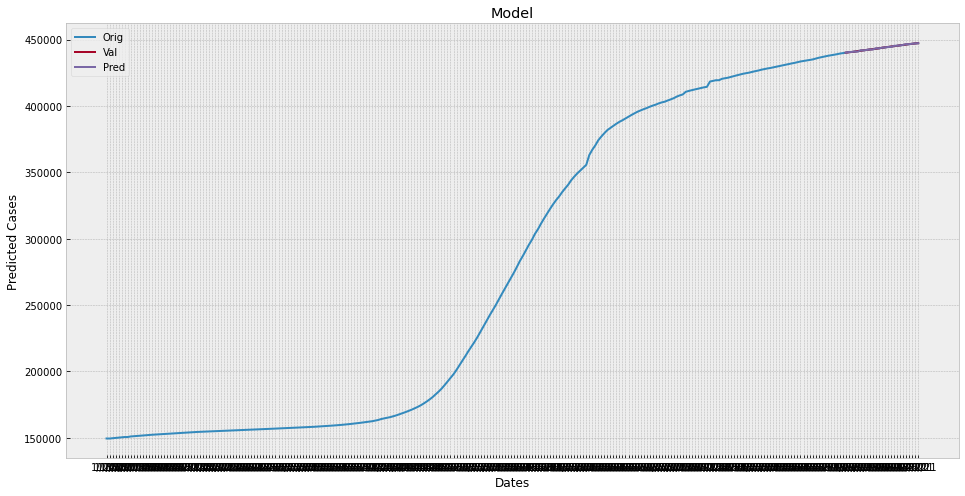

In [19]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df['Deaths'])
plt.plot(valid['Deaths'])
plt.plot(valid['Predicted Cases'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [20]:
valid

,Deaths,Predicted Cases
Date,,
9/3/21,440225,440225.0
9/4/21,440533,440752.0
9/5/21,440752,440752.0
9/6/21,441042,441042.0
9/7/21,441411,441042.0
9/8/21,441749,442009.0
9/9/21,442009,442009.0
9/10/21,442317,442317.0
9/11/21,442655,442655.0


In [21]:
from sklearn.metrics import r2_score
score = r2_score(valid['Deaths'], valid['Predicted Cases'])
print(score)

0.9948893927071283


<AxesSubplot:xlabel='Date'>

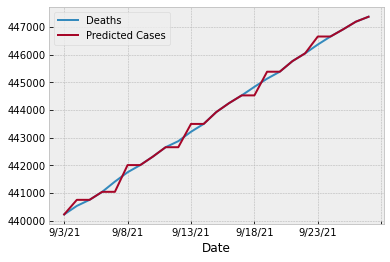

In [22]:
valid.plot()